# 지도학습

> 분류와 회귀

- 과대적합 & 과소적합 56p~ 읽어두기

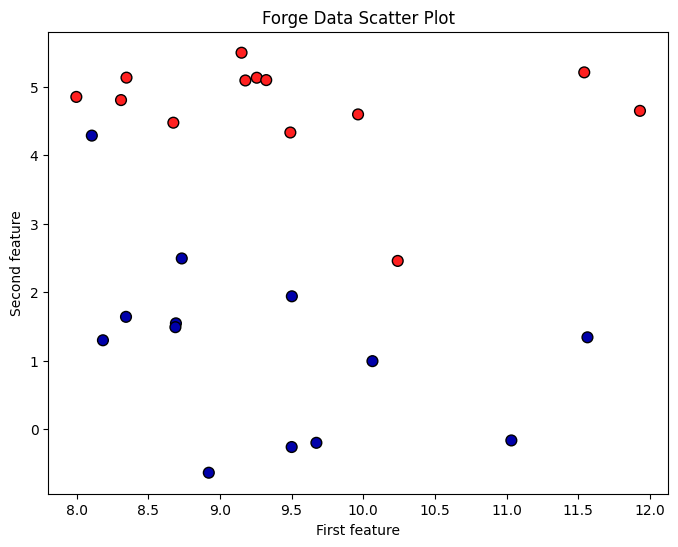

In [1]:
import matplotlib.pyplot as plt
import mglearn

# 데이터 생성
x, y = mglearn.datasets.make_forge()

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Forge Data Scatter Plot")
plt.show()

X.shape: (26, 2)


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPyth

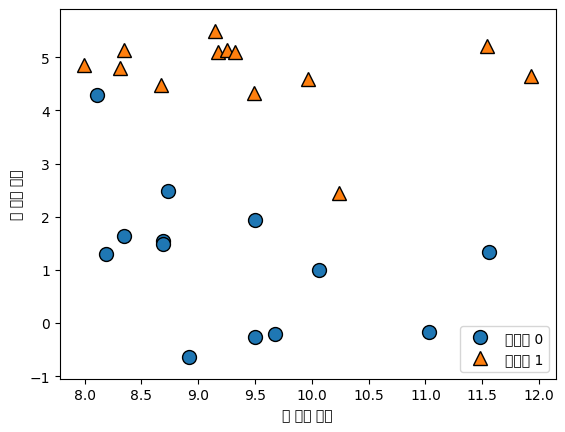

In [2]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)
plt.show() # 책에는 없음

In [3]:
import pandas as pd
import numpy as np

# 데이터 URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# 데이터를 읽어들임
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 데이터를 hstack을 사용하여 결합
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# 타겟 값 설정
target = raw_df.values[1::2, 2]

# 데이터 형태 출력
print("데이터의 형태:", data.shape)

데이터의 형태: (506, 13)


In [4]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


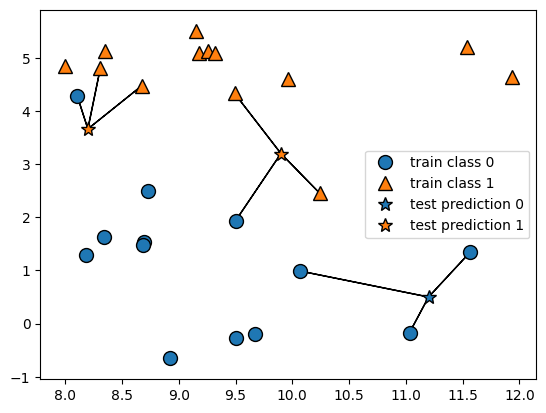

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


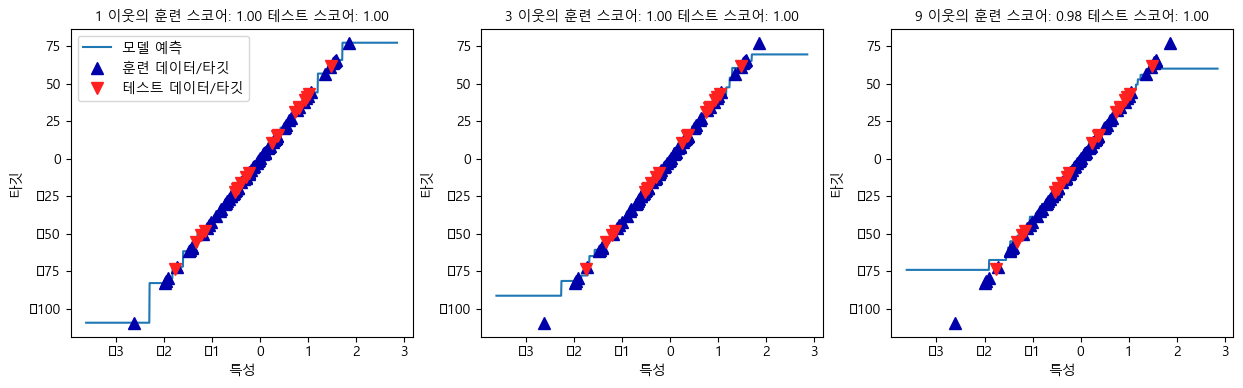

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import mglearn
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 경우
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# 데이터셋 생성
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# X_train 데이터 범위를 기반으로 -3 과 3 사이의 데이터 포인트를 조정합니다
line = np.linspace(X_train.min() - 1, X_train.max() + 1, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)),
        fontproperties=fontprop)
    ax.set_xlabel("특성", fontproperties=fontprop)
    ax.set_ylabel("타깃", fontproperties=fontprop)

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best", prop=fontprop)
plt.show()


### 2024.07.16

- 105P~
- 챕터02 비선형부터

In [7]:
import pandas as pd
import mglearn
import preamble

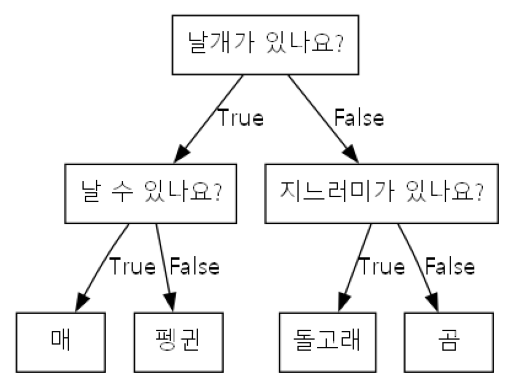

In [8]:
import mglearn
mglearn.plots.plot_animal_tree()

In [9]:
from preamble import *

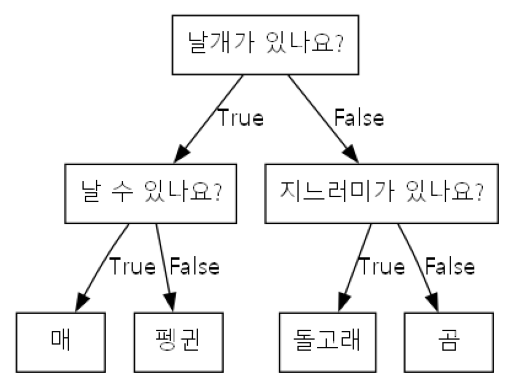

In [10]:
import mglearn
mglearn.plots.plot_animal_tree()

위키독스 한글깨짐 https://wikidocs.net/45798

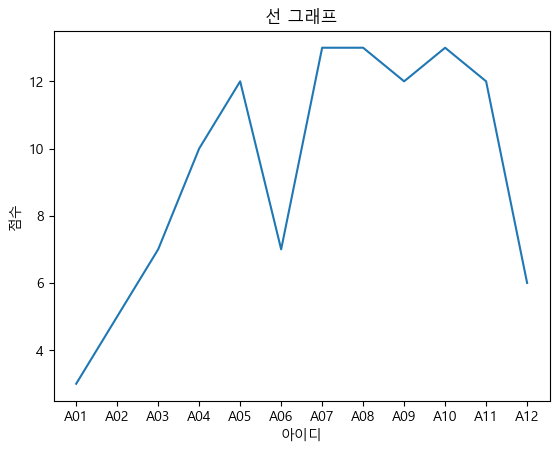

In [11]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

##########데이터 로드

df = pd.DataFrame([
        ['A01', 2, 1, 60, 139, 'country', 0, 3],
        ['A02', 3, 2, 80, 148, 'country', 0, 5],
        ['A03', 3, 4, 50, 149, 'country', 0, 7],
        ['A04', 5, 5, 40, 151, 'country', 0, 10],
        ['A05', 7, 5, 35, 154, 'city', 0, 12],
        ['A06', 2, 5, 45, 149, 'country', 0, 7],
        ['A07',8, 9, 40, 155, 'city', 1, 13],
        ['A08', 9, 10, 70, 155, 'city', 3, 13],
        ['A09', 6, 12, 55, 154, 'city', 0, 12],
        ['A10', 9, 2, 40, 156, 'city', 1, 13],
        ['A11', 6, 10, 60, 153, 'city', 0, 12],
        ['A12', 2, 4, 75, 151, 'country', 0, 6]
    ], columns=['ID', 'hour', 'attendance', 'weight', 'iq', 'region', 'library', 'score'])

##########데이터 분석

plt.plot(df['ID'], df['score']) #x축, y축
plt.title('선 그래프')
plt.xlabel('아이디')
plt.ylabel('점수')
plt.show()

### 한국어 출력할때.

- plt => 폰트 설정('맑은 고딕')
- 폰트 설치부터 다시
- 아직 미해결.

# 결정트리와 랜덤 포레스트

## 결정트리
- 장점 : 전처리에 민감하지 않음
- 단점 : 데이터에 민감함

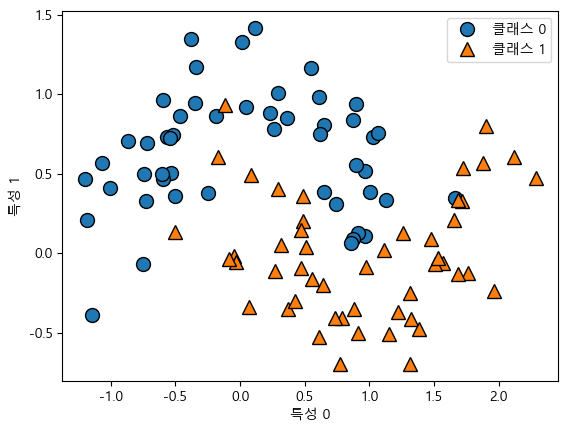

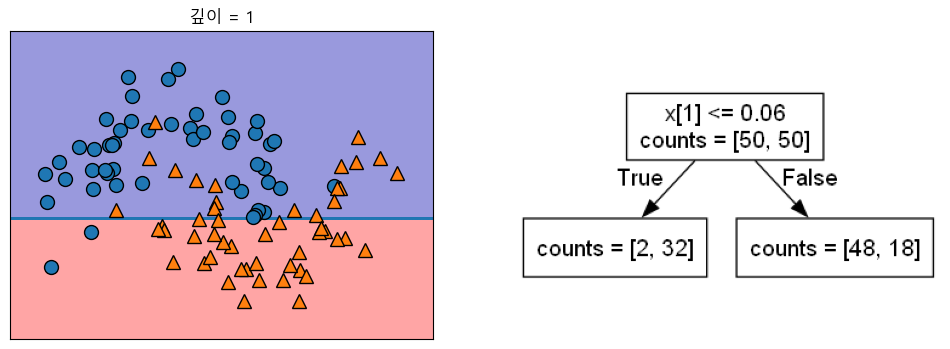

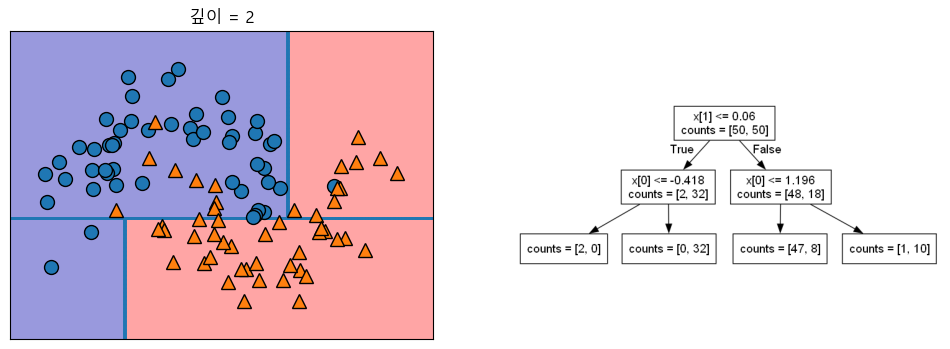

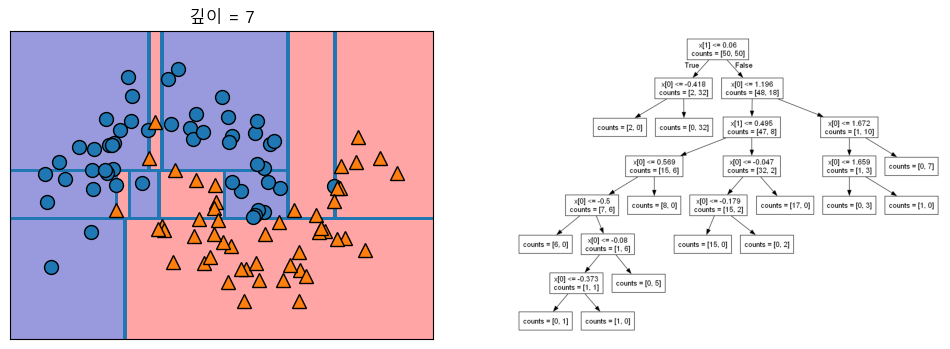

In [12]:
# 결정트리 과정을 도식화함.
mglearn.plots.plot_tree_progressive()

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from  sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train), tree.score(X_test, y_test))

0.9882629107981221 0.9440559440559441


In [14]:
cancer["data"].shape

(569, 30)

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Load dataset
cancer = load_breast_cancer()

# Train a decision tree classifier (example)
tree = DecisionTreeClassifier()
tree.fit(cancer.data, cancer.target)

# Export the decision tree as a DOT file
export_graphviz(tree, out_file="tree.dot",
                class_names=["악성","양성"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

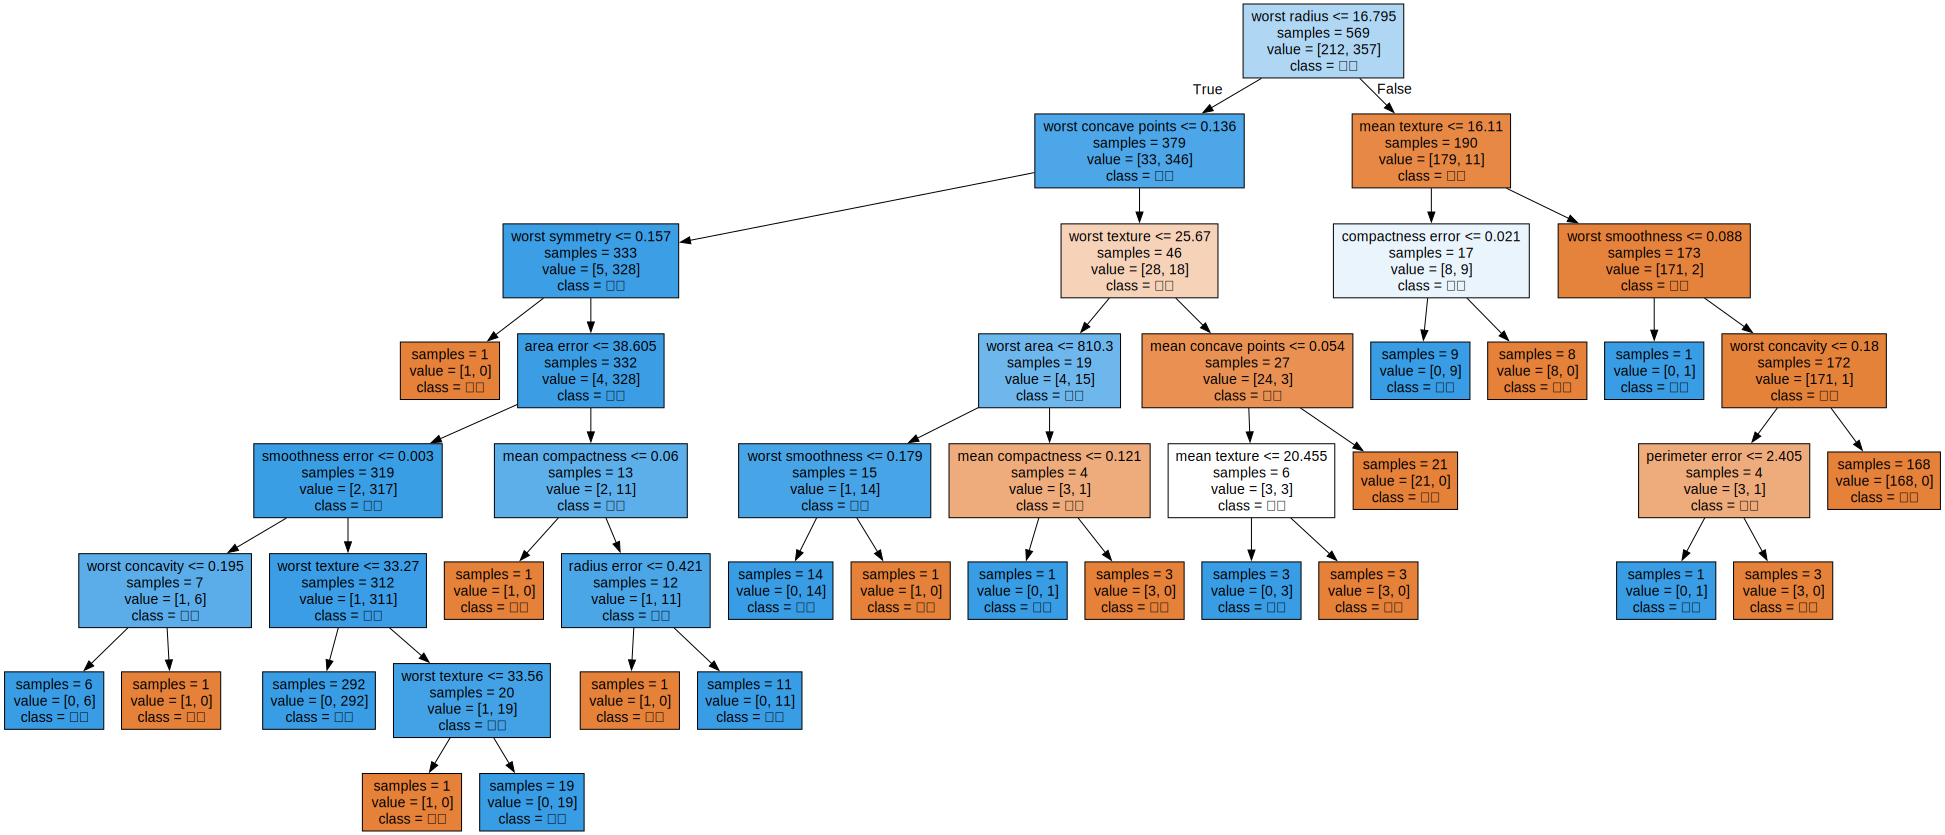

In [16]:
import graphviz

# Read the DOT file and display the graph
with open("tree.dot", encoding="utf-8") as f:  # Use utf-8 encoding or the correct encoding for your file
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [17]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.04248468 0.         0.         0.         0.01146992
 0.         0.00877112 0.         0.         0.00689159 0.
 0.00563858 0.00204521 0.00100384 0.03184137 0.         0.
 0.         0.         0.69559352 0.0460766  0.         0.0110859
 0.01440488 0.         0.0082799  0.10709688 0.007316   0.        ]


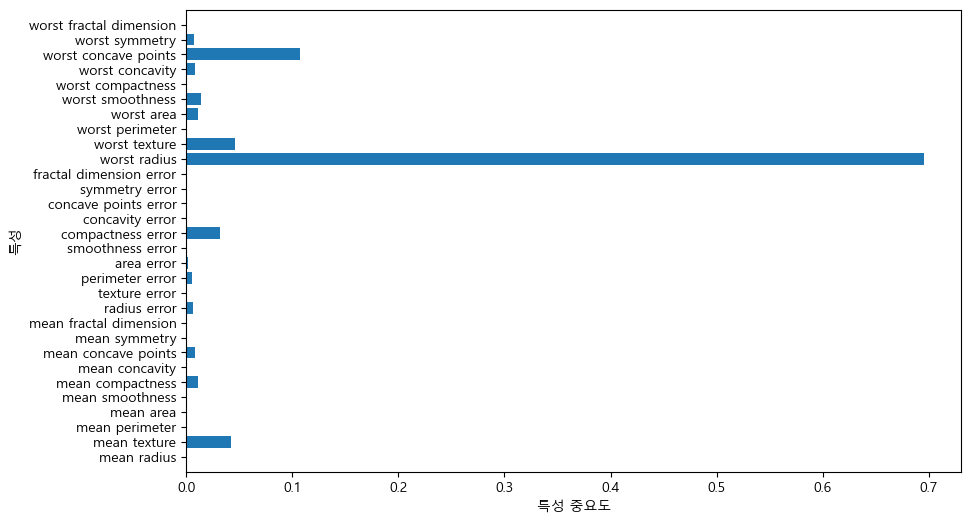

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = model.feature_importances_.shape[0]
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(n_features),
             model.feature_importances_,
             align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

# 예시 데이터셋과 트리 모델을 전달하여 함수 호출
plot_feature_importances_cancer(tree)

# 랜덤 포레스트

In [19]:
from sklearn.datasets import load_breast_cancer
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=42)

forest = RandomForestClassifier(max_depth=4, random_state=42)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train), tree.score(X_test, y_test))

0.9929577464788732 1.0


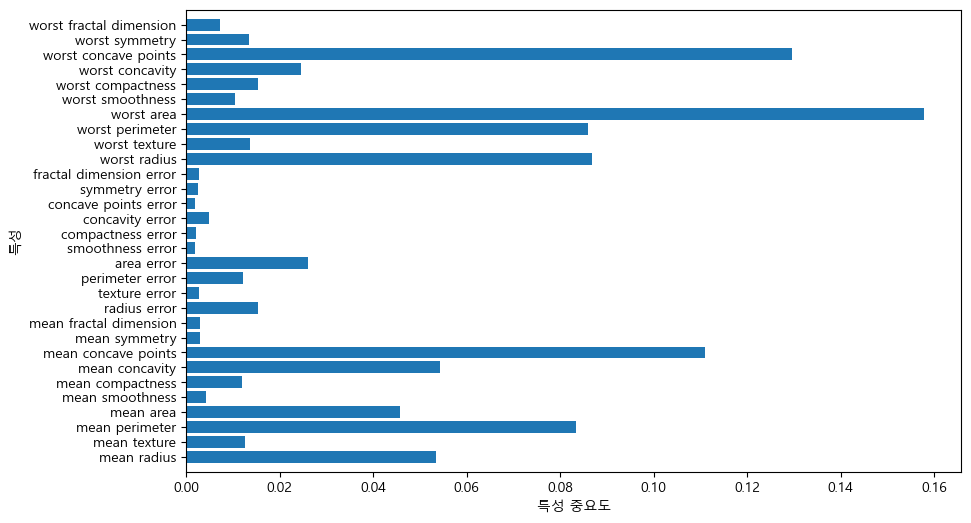

In [20]:
plot_feature_importances_cancer(forest)

### 예제

Text(0, 0.5, '가격 ($/Mbyte)')

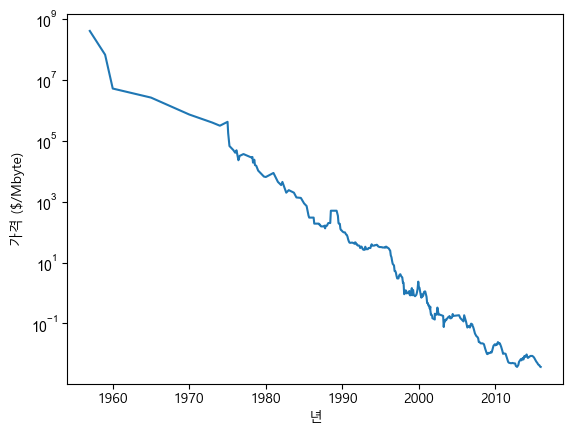

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt  

ram_price = pd.read_csv("data/ram_price.csv")

plt.yticks(fontname="Arial")
plt.semilogy(ram_price.date, ram_price.price)  #
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

date_train = ram_price[ram_price['date'] < 2000]
date_test = ram_price[ram_price['date'] >= 2000]

X_train = date_train[['date']]
y_train = np.log(date_train['price'])  

X_all = ram_price[['date']]

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


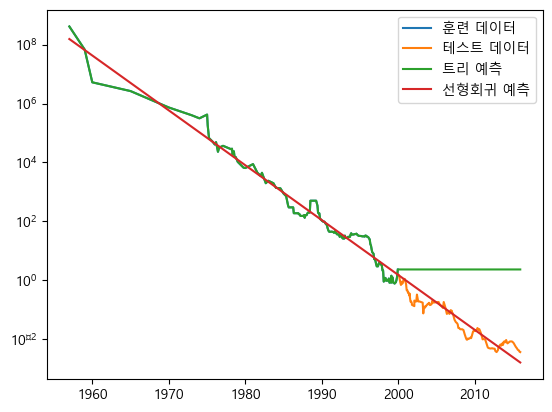

In [ ]:
import matplotlib.pyplot as plt

plt.semilogy(date_train.date, date_train.price, label="훈련 데이터")
plt.semilogy(date_test.date, date_test.price, label="테스트 데이터")
plt.semilogy(ram_price.date, price_tree, label="트리 예측")
plt.semilogy(ram_price.date, price_lr, label="선형회귀 예측")
plt.legend()
plt.show()

## 나이브 베이즈 


> 2024.07.17 (105P~)

> 2024.07.18

# svm

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz

# Load the dataset
cancer = load_breast_cancer()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=42)

# Train a Decision Tree Classifier
rfc = DecisionTreeClassifier(max_depth=4, random_state=42)
rfc.fit(X_train, y_train)

# Print training and test scores
print(rfc.score(X_train, y_train), rfc.score(X_test, y_test))

0.9882629107981221 0.9440559440559441


In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import graphviz

# Load the dataset
cancer = load_breast_cancer()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=42)

# Train a Decision Tree Classifier
rfc = DecisionTreeClassifier(max_depth=4, random_state=42)
rfc.fit(X_train, y_train)

# Print training and test scores for Decision Tree
print("Decision Tree Scores:")
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
print()

# Export the decision tree to a graphviz format
dot_data = export_graphviz(rfc,
                           feature_names=cancer.feature_names,
                           class_names=cancer.target_names,
                           special_characters=True,
                           rotate=True,
                           precision=1,
                           filled=True)

# Display the decision tree
graph = graphviz.Source(dot_data)
graph.render(view=True)

# Scale the data for SVC
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train_scaled, y_train)

# Print training and test scores for SVC
print("SVC Scores:")
print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test))

Decision Tree Scores:
0.9882629107981221
0.9440559440559441

SVC Scores:
0.9788732394366197
0.9790209790209791


### 딥러닝

In [33]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp >= theta:
        return 1
    else:
        return 0

In [34]:
print("AND 게이트 테스트:")
print("0 AND 0 =", AND(0, 0))
print("0 AND 1 =", AND(0, 1))
print("1 AND 0 =", AND(1, 0))
print("1 AND 1 =", AND(1, 1))

AND 게이트 테스트:
0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1


In [36]:
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.3
    tmp = w1*x1 + w2*x2
    if tmp >= theta:
        return 1
    else:
        return 0

In [37]:
# OR 게이트의 동작 테스트
print("\nOR 게이트 테스트:")
print("0 OR 0 =", OR(0, 0))
print("0 OR 1 =", OR(0, 1))
print("1 OR 0 =", OR(1, 0))
print("1 OR 1 =", OR(1, 1))


OR 게이트 테스트:
0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1
